In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import IPython.display as display

%matplotlib inline
import seaborn
# import mpld3

seaborn.set()
np.set_printoptions(precision=4, suppress=True)
# mpld3.enable_notebook()

## Conference Statistics

In [2]:
data = pd.read_csv("data/Conference Statistics.csv")
data

,Year,Location,Country,Number of Participants,Submitted Papers,Accepted Papers,Acceptance Rate
0,2000,"Plymouth, Massachusetts",USA,88,NaN,35,NaN
1,2001,"Bloomington, Indiana",USA,100,NaN,18,NaN
2,2002,Paris,France,175,NaN,57,NaN
3,2003,"Baltimore, Maryland",USA,136,NaN,50,NaN
4,2004,Barcelona,Spain,189,NaN,106,NaN
5,2005,London,UK,180,NaN,115,NaN
6,2006,"Victoria, British Columbia",Canada,180,NaN,96,NaN
7,2007,Vienna,Austria,250,NaN,129,NaN
8,2008,"Philadelphia, Pennsylvania",USA,257,173,107,62%
9,2009,Kobe,Japan,308,202,148,73%


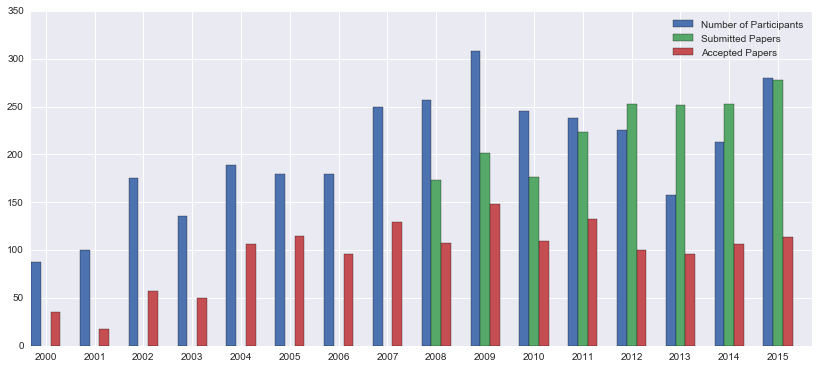

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
fields = ['Number of Participants', 'Submitted Papers', 'Accepted Papers']
for n, k in enumerate(fields):
    ax.bar(data.Year + 0.2*n, data[k], width=0.2, 
           fc=seaborn.color_palette()[n], label=k)

ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("")
plt.xticks(data.Year + 0.3, [str(v) for v in np.array(data.Year)])
plt.legend()